In [81]:
import os
import numpy as np
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from analysis._utils import *
import yaml

In [82]:
config = OmegaConf.load("../conf/analysis.yaml")
configs = {}
for file_path in find_config_files("../logs/hydra"):
    with open(file_path, 'r') as f:
        data = yaml.safe_load(f)
        parent_dir = os.path.dirname(file_path)
        if os.path.exists(os.path.join(parent_dir, "loss_curves.csv")):
            loss_df = pd.read_csv(os.path.join(parent_dir, "loss_curves.csv"), index_col=0)
            loss = loss_df["centered_test_losses"][loss_df["centered_test_losses"].idxmin()]
            configs[os.path.dirname(file_path)] = (loss, OmegaConf.create(data))
sorted(configs.keys())

['../logs/hydra/2023_04_14_10_58_11/0',
 '../logs/hydra/2023_04_14_10_58_11/1',
 '../logs/hydra/2023_04_14_10_58_11/10',
 '../logs/hydra/2023_04_14_10_58_11/11',
 '../logs/hydra/2023_04_14_10_58_11/12',
 '../logs/hydra/2023_04_14_10_58_11/13',
 '../logs/hydra/2023_04_14_10_58_11/14',
 '../logs/hydra/2023_04_14_10_58_11/15',
 '../logs/hydra/2023_04_14_10_58_11/16',
 '../logs/hydra/2023_04_14_10_58_11/17',
 '../logs/hydra/2023_04_14_10_58_11/18',
 '../logs/hydra/2023_04_14_10_58_11/19',
 '../logs/hydra/2023_04_14_10_58_11/2',
 '../logs/hydra/2023_04_14_10_58_11/20',
 '../logs/hydra/2023_04_14_10_58_11/21',
 '../logs/hydra/2023_04_14_10_58_11/22',
 '../logs/hydra/2023_04_14_10_58_11/23',
 '../logs/hydra/2023_04_14_10_58_11/24',
 '../logs/hydra/2023_04_14_10_58_11/25',
 '../logs/hydra/2023_04_14_10_58_11/26',
 '../logs/hydra/2023_04_14_10_58_11/27',
 '../logs/hydra/2023_04_14_10_58_11/28',
 '../logs/hydra/2023_04_14_10_58_11/29',
 '../logs/hydra/2023_04_14_10_58_11/3',
 '../logs/hydra/2023

In [83]:
trailing_dict = {}
for key, value in configs.items():
    dataset_name = value[1]["dataset"]["name"]
    if dataset_name != "Uzel2022":
        continue
    train_size = value[1]["train"]["train_size"]
    loss = value[0]
    print(f"{dataset_name} {train_size} {loss}")
    if dataset_name in trailing_dict:
        if train_size in trailing_dict[dataset_name]:
            trailing_dict[dataset_name][train_size].append(loss)
        else:
            trailing_dict[dataset_name].update({train_size: [loss]})
    else:
        trailing_dict[dataset_name] = {train_size: [loss]}
trailing_dict

Uzel2022 498 0.27145985
Uzel2022 498 0.28432482
Uzel2022 9965 0.2843273
Uzel2022 996 0.27146733
Uzel2022 4998 0.28432718
Uzel2022 996 0.28432652
Uzel2022 6 0.3319308
Uzel2022 6 0.3319308
Uzel2022 6 0.33422053
Uzel2022 6 0.30050495
Uzel2022 6 0.33500108
Uzel2022 6 0.30050495
Uzel2022 4998 0.28265476
Uzel2022 6 0.33422053
Uzel2022 4998 0.2549852
Uzel2022 996 0.27539182
Uzel2022 6 0.31878462
Uzel2022 996 0.28265777
Uzel2022 6 0.33422053
Uzel2022 9965 0.25498548
Uzel2022 6 0.33500108
Uzel2022 6 0.30050495
Uzel2022 6 0.3319308
Uzel2022 9965 0.28143513
Uzel2022 9965 0.28265426
Uzel2022 48 0.32379475
Uzel2022 9965 0.27539447
Uzel2022 4998 0.27539387
Uzel2022 6 0.32464847
Uzel2022 6 0.32464847
Uzel2022 96 0.32350588
Uzel2022 9965 0.27147186
Uzel2022 48 0.32695684
Uzel2022 6 0.32464847
Uzel2022 48 0.31586438
Uzel2022 4998 0.2714711
Uzel2022 6 0.31878462
Uzel2022 498 0.27538836
Uzel2022 48 0.3122003
Uzel2022 996 0.2814359
Uzel2022 498 0.28143653
Uzel2022 96 0.32038844
Uzel2022 996 0.2549841
Uzel

{'Uzel2022': {498: [0.27145985,
   0.28432482,
   0.27538836,
   0.28143653,
   0.2826607,
   0.2549782],
  9965: [0.2843273,
   0.25498548,
   0.28143513,
   0.28265426,
   0.27539447,
   0.27147186],
  996: [0.27146733, 0.28432652, 0.27539182, 0.28265777, 0.2814359, 0.2549841],
  4998: [0.28432718, 0.28265476, 0.2549852, 0.27539387, 0.2714711, 0.28143525],
  6: [0.3319308,
   0.3319308,
   0.33422053,
   0.30050495,
   0.33500108,
   0.30050495,
   0.33422053,
   0.31878462,
   0.33422053,
   0.33500108,
   0.30050495,
   0.3319308,
   0.32464847,
   0.32464847,
   0.32464847,
   0.31878462,
   0.31878462,
   0.33500108],
  48: [0.32379475, 0.32695684, 0.31586438, 0.3122003, 0.3247212, 0.29248172],
  96: [0.32350588, 0.32038844, 0.30899432, 0.3114286, 0.2883011, 0.31995493]}}

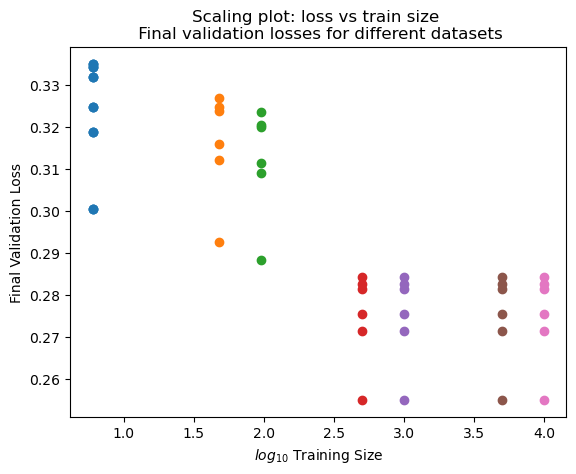

In [84]:
for dataset_name, dataset_dict in trailing_dict.items():
    pairs = sorted(zip(dataset_dict.keys(), dataset_dict.values()))
    for x, y in pairs:
        plt.scatter(np.log10(x)*np.ones_like(y), y, label=dataset_name, marker="o")
plt.legend()
plt.xlabel("$log_{10}$ Training Size")
plt.ylabel("Final Validation Loss")
plt.title("Scaling plot: loss vs train size \n Final validation losses for different datasets")
plt.savefig("figures/trailing_loss.png")

In [72]:
def plot_trailing_loss_vs_parameter_legend(config_pardir, parameter, legend):
    configs = {}
    # go through all the config files and get the parameters and the loss
    for file_path in find_config_files(config_pardir):
        with open(file_path, 'r') as f:
            data = yaml.safe_load(f)
            parent_dir = os.path.dirname(file_path)
            if os.path.exists(os.path.join(parent_dir, "loss_curves.csv")):
                loss_df = pd.read_csv(os.path.join(parent_dir, "loss_curves.csv"), index_col=0)
                loss = loss_df["centered_test_losses"][loss_df["centered_test_losses"].idxmin()]
                configs[os.path.dirname(file_path)] = (loss, OmegaConf.create(data))

    parameters = parameter.split(".")
    param_name = parameters[1]
    legends = legend.split(".")

    # get the trailing loss for each parameter value
    trailing_dict = {}
    for key, value in configs.items():
        legend_name = value[1][legends[0]][legends[1]]
        param_value = value[1][parameters[0]][parameters[1]]
        loss = value[0]
        print(f"{legend_name} {param_value} {loss}")
        if legend_name in trailing_dict.keys():
            trailing_dict[legend_name].update({param_value: loss})
        else:
            trailing_dict[legend_name] = {param_value: loss}

    # plot the trailing loss for each parameter value
    for para_n, val_dict in trailing_dict.items():
        sorted_x, sorted_y = zip(*sorted(zip(list(val_dict.keys()), list(val_dict.values()))))
        x = sorted_x
        plt.plot(np.log10(sorted_x), sorted_y, label=para_n, marker="o")

    plt.legend()
    plt.xlabel("$log_{10}$ Training Size")
    plt.ylabel("Final Validation Loss")
    plt.title("Scaling plot: loss vs train size \n Final validation losses for different datasets")
    plt.savefig("figures/trailing_loss.png")

Uzel2022 498 0.27145985
Uzel2022 498 0.28432482
Uzel2022 9965 0.2843273
Uzel2022 996 0.27146733
Uzel2022 4998 0.28432718
Uzel2022 996 0.28432652
Uzel2022 6 0.3319308
Uzel2022 6 0.3319308
Uzel2022 6 0.33422053
Uzel2022 6 0.30050495
Uzel2022 6 0.33500108
Uzel2022 6 0.30050495
Uzel2022 4998 0.28265476
Uzel2022 6 0.33422053
Uzel2022 4998 0.2549852
Uzel2022 996 0.27539182
Uzel2022 6 0.31878462
Uzel2022 996 0.28265777
Uzel2022 6 0.33422053
Uzel2022 9965 0.25498548
Uzel2022 6 0.33500108
Uzel2022 6 0.30050495
Uzel2022 6 0.3319308
Uzel2022 9965 0.28143513
Uzel2022 9965 0.28265426
Uzel2022 48 0.32379475
Uzel2022 9965 0.27539447
Uzel2022 4998 0.27539387
Uzel2022 6 0.32464847
Uzel2022 6 0.32464847
Uzel2022 96 0.32350588
Uzel2022 9965 0.27147186
Uzel2022 48 0.32695684
Uzel2022 6 0.32464847
Uzel2022 48 0.31586438
Uzel2022 4998 0.2714711
Uzel2022 6 0.31878462
Uzel2022 498 0.27538836
Uzel2022 48 0.3122003
Uzel2022 996 0.2814359
Uzel2022 498 0.28143653
Uzel2022 96 0.32038844
Uzel2022 996 0.2549841
Uzel

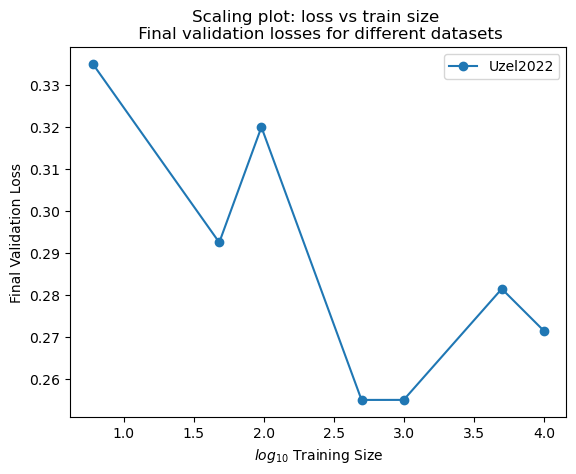

In [73]:
plot_trailing_loss_vs_parameter_legend("../logs/hydra", "train.train_size", "dataset.name")